In [69]:
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

Read Data

In [70]:
inPath='/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NOAA-GFDL.GFDL-CM2p1/r1i1p1/'
inFile='/tas_Amon_GFDL-CM2p1_rcp45_r1i1p1_200601-201012.nc'
fname=inPath+inFile
print(fname)

/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NOAA-GFDL.GFDL-CM2p1/r1i1p1//tas_Amon_GFDL-CM2p1_rcp45_r1i1p1_200601-201012.nc


In [71]:
ncfile = Dataset(fname, 'r')
lats = ncfile.variables['lat'][:]
ny=lats.size
lons = ncfile.variables['lon'][:]
nx=lons.size
nctime = ncfile.variables['time'][:]
nt=nctime.size
data=ncfile.variables['tas'][:,:,:]
ncfile.close()

Global Contour Plot of Data at t=1

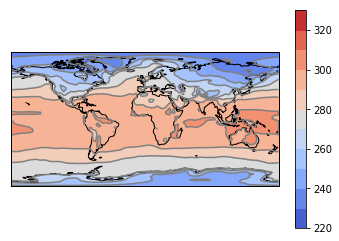

In [72]:
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(220,340,10)
x=np.ones((ny,nx))*data[0,:,np.newaxis]
datacyc,loncyc=add_cyclic_point(data[0,:,:],coord=lons)
contour=ax.contourf(loncyc, lats, datacyc, levels = clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(contour)
contourlines=ax.contour(loncyc,lats,datacyc,levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
plt.show()